In [1]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import numpy as np
import anndata as ad 

In [2]:
def load_data(file_paths):
    adata_list = []
    for file_path in file_paths:
        adata_temp = sc.read_h5ad(file_path)
        adata_list.append(adata_temp)
    return adata_list

def load_data_merge(file_paths, samples):
    adata_list = []
    for file_path in file_paths:
        adata_temp = sc.read_h5ad(file_path)
        print(adata_temp)
        adata_temp.obs_names_make_unique()
        adata_temp.var_names_make_unique()
        adata_list.append(adata_temp)
    adata_pre = ad.concat(adata_list, index_unique="-", keys = samples)
    del adata_temp
    del adata_list
    return adata_pre


import matplotlib
import seaborn as sns
def get_colors(num):
    if num < 10:
        return sns.color_palette(palette='tab10', n_colors=num).as_hex()
    elif num < 20:
        return sns.color_palette(palette='tab20', n_colors=num).as_hex()
    else:
        return list(matplotlib.colors.cnames.values())[:num]

In [10]:
# MOSTA -- MERFISH  'E10.5_E1S1',
samples = ['E9.5_E1S1', 'E10.5_E2S1', 'E11.5_E1S1']
input_dir = 'G:/dataset/11-MOSTA/input/'
adata_list = []
for i in range(len(samples)):
    adata_temp = sc.read_h5ad(input_dir+samples[i]+'.h5ad')
    print(adata_temp)
    adata_temp.obs_names_make_unique()
    adata_temp.var_names_make_unique()
    adata_temp.obs['batch'] = [samples[i] for j in range(adata_temp.shape[0])]
    adata_list.append(adata_temp)
adata = ad.concat(adata_list, index_unique="-", keys = samples)
del adata_list
print(adata)

AnnData object with n_obs × n_vars = 1127 × 166
    obs: 'orig.ident', 'nCount_STARmap', 'nFeature_STARmap', 'CellID', 'ClusterID', 'ClusterName', 'x', 'y', 'c', 'z', 'batch'
    var: 'features'
AnnData object with n_obs × n_vars = 1380 × 166
    obs: 'orig.ident', 'nCount_STARmap', 'nFeature_STARmap', 'CellID', 'ClusterID', 'ClusterName', 'x', 'y', 'c', 'z', 'batch'
    var: 'features'
AnnData object with n_obs × n_vars = 1215 × 166
    obs: 'orig.ident', 'nCount_STARmap', 'nFeature_STARmap', 'CellID', 'ClusterID', 'ClusterName', 'x', 'y', 'c', 'z', 'batch'
    var: 'features'
AnnData object with n_obs × n_vars = 3190 × 166
    obs: 'orig.ident', 'nCount_STARmap', 'nFeature_STARmap', 'CellID', 'ClusterID', 'ClusterName', 'x', 'y', 'c', 'z', 'batch'
    obsm: 'spatial'


In [12]:
import anndata as ad
def load_data(input_dir, samples):
    adata_list = []
    for sample in samples:
        adata_temp = sc.read_h5ad(input_dir + sample + '.h5ad')
        adata_temp = adata_temp[adata_temp.obs['ClusterName']!='NA']
        adata_temp.var_names_make_unique()
        adata_temp.obs_names_make_unique()
        adata_temp.obsm['spatial'] = adata_temp.obs[['x', 'y']].values
        if sample == 'BZ5':
            adata_temp.obs['z'] = adata_temp.obs['z'] + 1
            adata_temp.obs['z'] = adata_temp.obs['z'].astype('str')
        print(adata_temp.shape)
        adata_list.append(adata_temp)
    adata_pre = ad.concat(adata_list, index_unique="-", keys = samples)
    return adata_pre

samples = ['BZ5', 'BZ9', 'BZ14']
input_dir = 'G:/dataset/08-STARmap/input/'
annotation = 'z'   #  ClusterName  15        z  4
print("samples: ", samples)
adata_pre = load_data(input_dir, samples)
adata_pre.obs[annotation] = adata_pre.obs[annotation].astype("category")
adata_pre.obs['batch'] = adata_pre.obs['batch'].astype('category')
# adata_pre.obsm['spatial'] = adata_pre.obs[['x', 'y']].values
adata_pre.obsm['spatial'] = adata_pre.obsm['spatial'].astype(float)
adata_pre

samples:  ['BZ5', 'BZ9', 'BZ14']
(1049, 166)
(1053, 166)
(1088, 166)


AnnData object with n_obs × n_vars = 3190 × 166
    obs: 'orig.ident', 'nCount_STARmap', 'nFeature_STARmap', 'CellID', 'ClusterID', 'ClusterName', 'x', 'y', 'c', 'z', 'batch'
    obsm: 'spatial'

In [4]:
method = 'GraphST'
input_dir = 'G:/dataset/11-MOSTA/output/MOSTA_h5ad/'
adata = sc.read(input_dir + method + '_K25_result_new.h5ad')
print(adata)
print(adata.obs['batch'].value_counts())

AnnData object with n_obs × n_vars = 39451 × 22143
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'annotation', 'Regulon - Alx1', 'Regulon - Alx3', 'Regulon - Alx4', 'Regulon - Barhl1', 'Regulon - Bcl3', 'Regulon - Bclaf1', 'Regulon - Bmyc', 'Regulon - Brf2', 'Regulon - Bsx', 'Regulon - Cdx2', 'Regulon - Cebpa', 'Regulon - Clock', 'Regulon - Creb3l1', 'Regulon - Crem', 'Regulon - Ctcf', 'Regulon - Cux1', 'Regulon - Dbx1', 'Regulon - Dbx2', 'Regulon - Dlx1', 'Regulon - Dlx2', 'Regulon - Dlx5', 'Regulon - Dlx6', 'Regulon - E2f1', 'Regulon - E2f2', 'Regulon - E2f3', 'Regulon - E2f4', 'Regulon - E2f6', 'Regulon - Egr3', 'Regulon - Elk1', 'Regulon - Elk3', 'Regulon - Emx1', 'Regulon - Emx2', 'Regulon - Esrra', 'Regulon - Esrrg', 'Regulon - Ets1', 'Regulon - Ets2', 'Regulon - Etv2', 'Regulon - Evx1', 'Regulon - Evx2', 'Regulon - Ezh2', 'Regulon - Fli1', 'Regulon - Foxa1', 'Regulon - Foxa2', 'Regulon - Foxa3', 'Regulon - Foxc2', 'Regulon - Foxd3

In [14]:
adata = adata_pre
df = pd.DataFrame(adata.obsm['spatial'],columns=['x','y'])
df['label'] = adata.obs[[annotation]].values
# df['leiden_'+method] = adata.obs[['leiden_'+method]].values
# df['louvain_'+method] = adata.obs[['louvain_'+method]].values
# df['mclust_'+method] = adata.obs[['mclust_'+method]].values
df['batch'] = adata.obs[['batch']].values

celltypes = sorted(list(df['label'].unique()))
colors = get_colors(len(celltypes))
label_dict = dict(zip(celltypes, colors))
df['color'] = df['label'].replace(dict(zip(celltypes, colors)))
batchs = sorted(list(df['batch'].unique()))

In [20]:
# batchs = ['E9.5_E1S1', 'E10.5_E1S1', 'E10.5_E2S1', 'E11.5_E1S1']
batchs = samples
# clusters = ['mclust_'+method, 'louvain_'+method, 'leiden_'+method]
clusters = ['label']
output_path = 'G:/dataset/11-MOSTA/output/result/cluster_pic/'

label


NameError: name 'method' is not defined

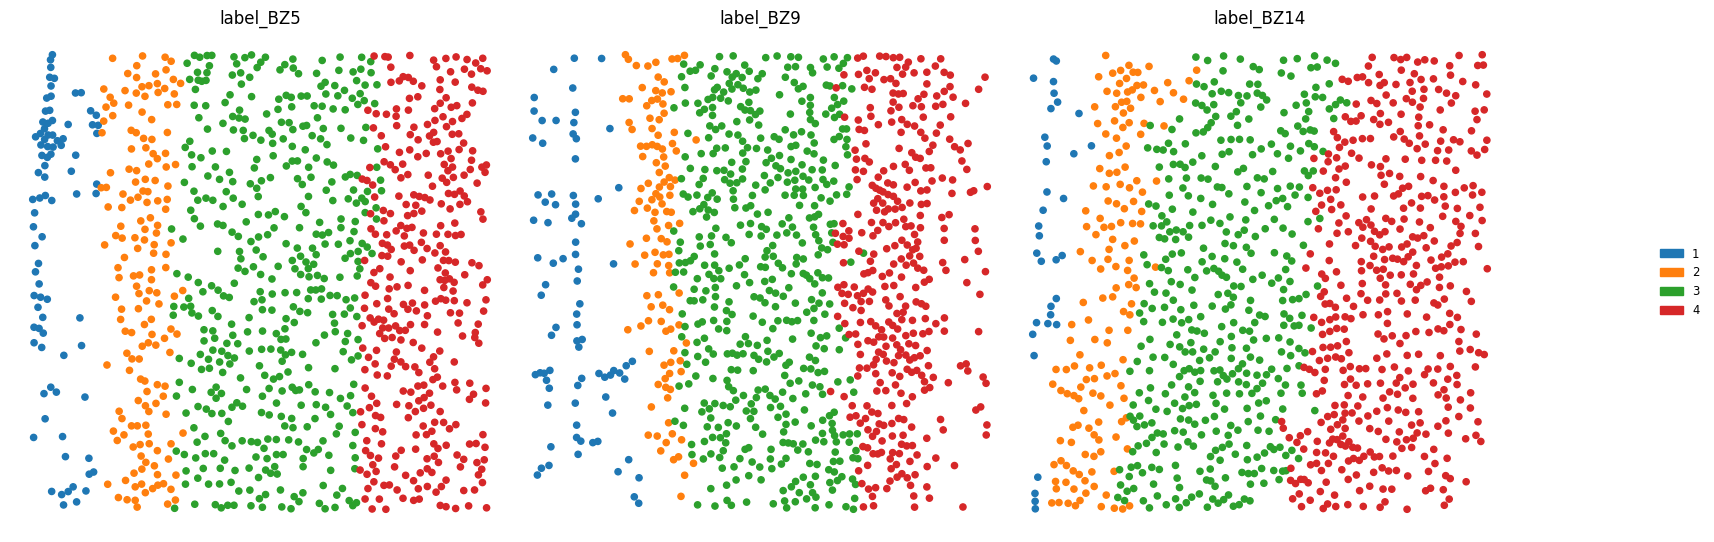

In [24]:
patch_list = []
for i in range(len(celltypes)):
    import matplotlib.patches as mpatches
    patch_list.append( mpatches.Patch(color=colors[i], label=celltypes[i]) )

fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_axes([0,      0.0,   0.25,  0.25])
ax2 = fig.add_axes([0.25,   0.0,   0.25,  0.25])
ax3 = fig.add_axes([0.5,    0.0,   0.25,  0.25])
# ax4 = fig.add_axes([0,      0.3,   0.25,  0.25])
# ax5 = fig.add_axes([0.25,   0.3,   0.25,  0.25])
# ax6 = fig.add_axes([0.5,    0.3,   0.25,  0.25])
# ax7 = fig.add_axes([0,      0.6,   0.25,  0.25])
# ax8 = fig.add_axes([0.25,   0.6,   0.25,  0.25])
# ax9 = fig.add_axes([0.5,    0.6,   0.25,  0.25])

# ax = [[ax1, ax2, ax3], [ax4, ax5, ax6], [ax7, ax8, ax9]]
ax = [[ax1, ax2, ax3]]
# fig, ax = plt.subplots(11, 3)
for j in range(len(clusters)):
    cluster = clusters[j]
    print(cluster)
    celltypes = sorted(list(df[cluster].unique()))
    colors = get_colors(len(celltypes))
    label_dict = dict(zip(celltypes, colors))
    df['color'] = df[cluster].replace(dict(zip(celltypes, colors)))
    for i in range(len(batchs)):
        df_tmp = df[df['batch']==batchs[i]]
        ax[j][int(i%3)].axis('off')
        for c in celltypes:
            df_tmp2 = df_tmp[df_tmp[cluster]==c]
            if batchs[i] == 'E10.5_E1S1':
                s = 0.4
            elif batchs[i] == 'E11.5_E1S1':
                s = 0.1
            else:
                s = 20
            ax[j][int(i%3)].scatter(df_tmp2.x, df_tmp2.y, alpha = 1,c = df_tmp2.color, s = s)
            ax[j][int(i%3)].set_title(clusters[j] + '_' + batchs[i])

plt.legend(handles=patch_list,bbox_to_anchor=(1.4, 0.5), loc=7, frameon=False, fontsize = 'small')

plt.savefig(output_path+method+'.png',dpi=300)

<Figure size 900x900 with 0 Axes>

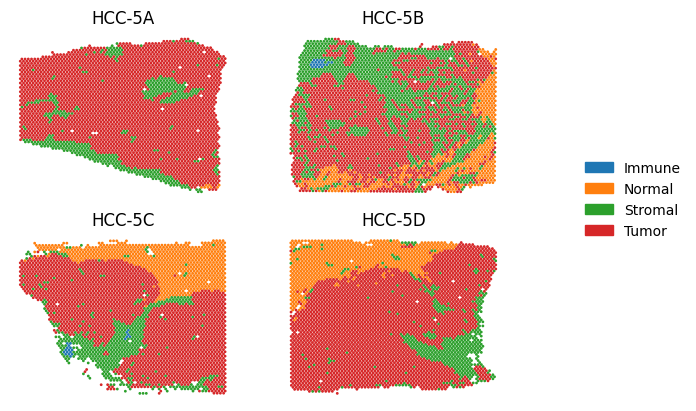

In [34]:
patch_list = []
for i in range(len(celltypes)):
    import matplotlib.patches as mpatches
    patch_list.append( mpatches.Patch(color=colors[i], label=celltypes[i]) )

fig = plt.figure(figsize = (9, 9))

fig, ax = plt.subplots(2, 2)
for i in range(len(batchs)):
    df_tmp = df[df['batch']==batchs[i]]
    ax[int(i/2)][int(i%2)].axis('off')
    for c in celltypes:
        df_tmp2 = df_tmp[df_tmp['label']==c]
        ax[int(i/2)][int(i%2)].scatter(df_tmp2.x, df_tmp2.y, alpha = 1,c = df_tmp2.color, s = 1)
        ax[int(i/2)][int(i%2)].set_title(samples[i]) 

plt.legend(handles=patch_list,bbox_to_anchor=(1.8, 1.2), loc=7, borderaxespad=0., frameon=False)
# plt.savefig('G:/dataset/result_pic/data_batch/test4.png',dpi=300)

In [ ]:
adata_list = load_data([input_dir+sample+'.h5ad' for sample in samples])
for i in range(len(adata_list)):
    adata_list[i].obsm['spatial'] = adata_list[i].obs[['x', 'y']].values
    sc.pl.spatial(adata_list[i], color=['Classification'], show=False, legend_fontsize=12, legend_fontoutline=2, frameon=False, 
                  img_key='hires', spot_size=100, title=samples[i])
#     plt.savefig(output_dir + method + '_' + samples[i] + '_spatial.png', dpi=300)